# Kalman Filter

## Application in Chaotic system 

In [16]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Lorenz system equations
def lorenz(t, xyz, sigma, rho, beta):
    x, y, z = xyz
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Parameters
sigma = 10.0
rho = 28.0
beta = 8.0 / 3.0

# Initial conditions
initial_xyz = np.array([5, 5, 5])

# Time span
t_span = (0, 20)
# t_eval = np.linspace(t_span[0], t_span[1], 5000)
t_eval = np.arange(t_span[0], t_span[1], 0.01)


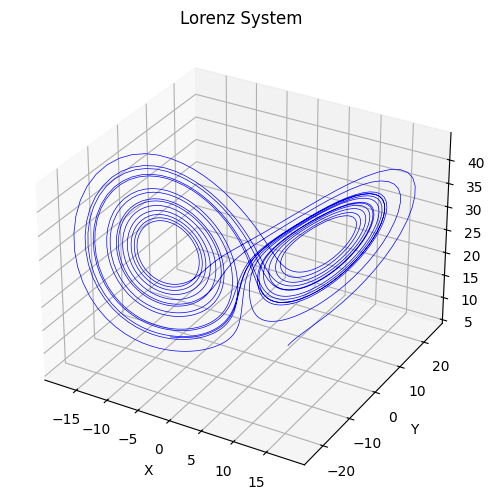

In [17]:
# Solve the system
sol = solve_ivp(lorenz, t_span, initial_xyz, args=(sigma, rho, beta), t_eval=t_eval)

true_sol = sol.y

# Plot the results
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(true_sol[0], true_sol[1], true_sol[2], 'b-', linewidth=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Lorenz System')
plt.show()


## Demo: Sensitive dependence on Initial Condition

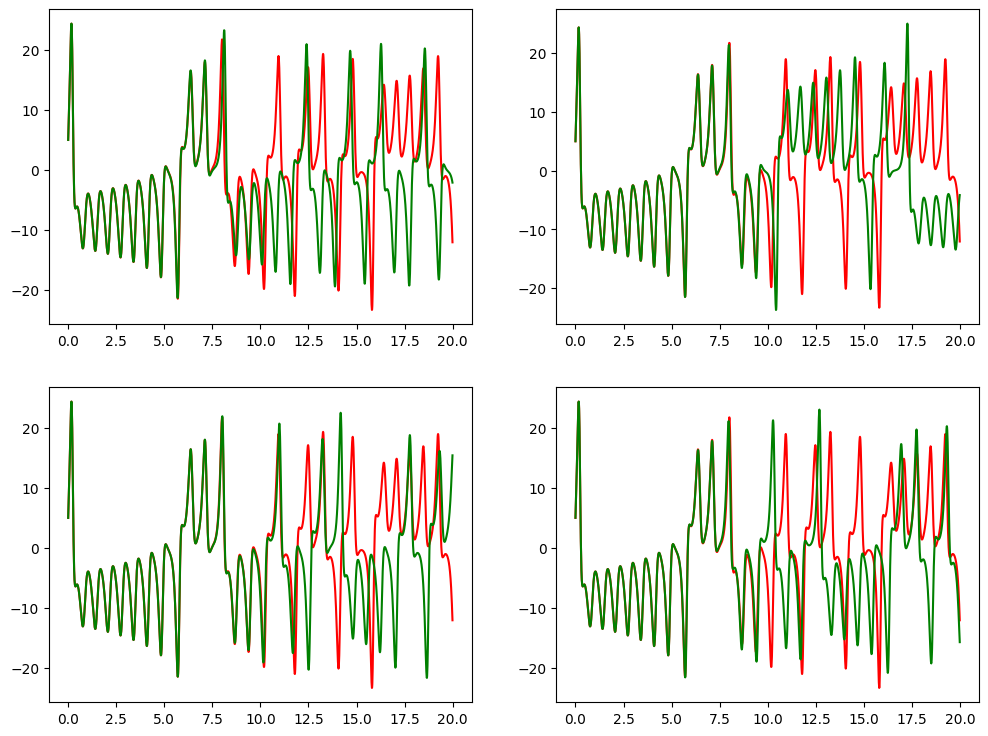

In [19]:
noise_level = .01

plt.figure(figsize=(12,9))

for j in range(4):
    noisy_initial_xyz = initial_xyz + np.random.normal(0, noise_level, size = (3))

    # Solve the system with noisy IC
    sol = solve_ivp(lorenz, t_span, noisy_initial_xyz, args=(sigma, rho, beta), t_eval=t_eval)

    noisy_sol = sol.y

    plt.subplot(2,2,j+1)
    plt.plot(t_eval, true_sol[1], color='r', label = 'true y(t)')
    plt.plot(t_eval, noisy_sol[1], color='g', label = 'simulated y(t)')
    

## Noisy observation

In [20]:
# Covariance matrices
Q = np.eye(3) * 0.01  # Process noise covariance
R = np.eye(3) * 5.0  # Measuremet noise covariance


In [21]:
measure_width = 100
#Measurement points are spread apart
t_measure = t_eval[::measure_width]

measured_sol = true_sol[:,::measure_width] 
#Adding measurement noise
# measured_sol += np.random.multivariate_normal([0,0,0], R, size = measured_sol[0].shape).transpose()
measured_sol = measured_sol + np.random.multivariate_normal([0,0,0], R, size = measured_sol[0].shape).transpose()


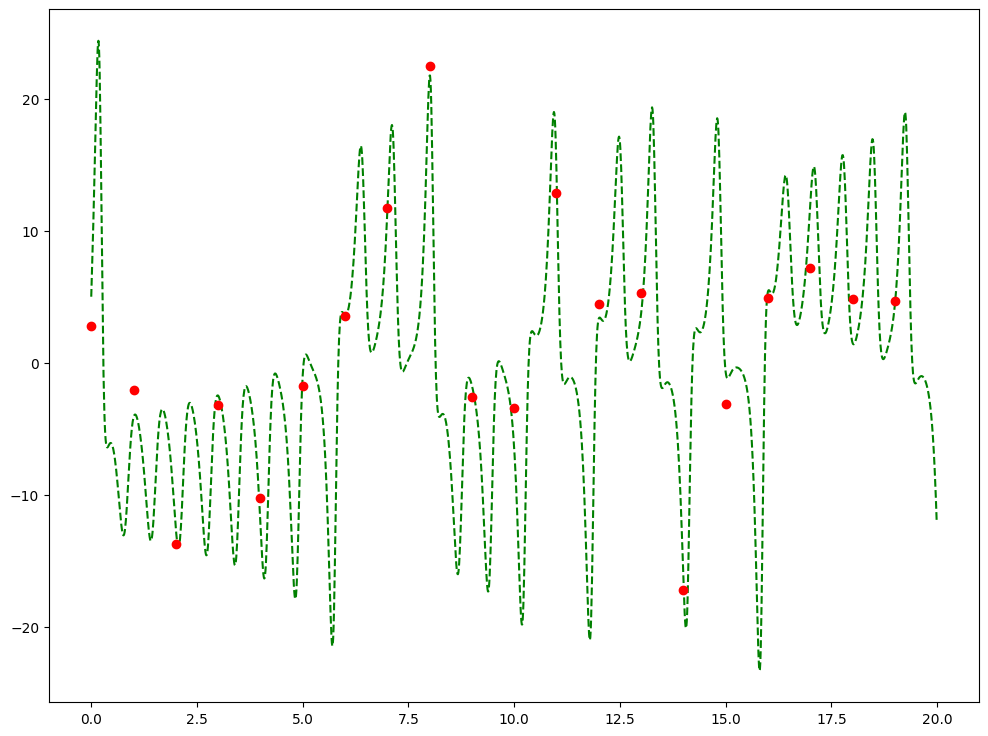

In [22]:
plt.figure(figsize=(12,9))
plt.plot(t_eval, true_sol[1], c= 'g', ls='--', label = 'true y(t)')
plt.plot(t_measure, measured_sol[1], 'ro', label = 'measured y(t)')